In [43]:
import sqlalchemy
import mysql.connector
import sqlite3
import pandas as pd
from pandas import DataFrame, Series

# creating connection
conn = mysql.connector.connect(
  host="3.135.162.69",
  user="chuckwx",
  password="jfr716!!00"
)

mycursor = conn.cursor()
mycursor.execute("USE trweather;")
pop1 = ("select * from trw order by timeGroup DESC LIMIT 30;")
mycursor.execute(pop1)
allDays = mycursor.fetchall()

colNames = ['Index', 'Rain', 'HiTemp', 'LowTemp', 'Year', 'Month', 'Day', 'timeGroup']
df = pd.DataFrame(allDays, columns = colNames)
df = df.iloc[::-1]
newDate = df['Month'] + df['Day']

      Index  Rain  HiTemp  LowTemp  Year  Month  Day  timeGroup
29  13532.0  0.00    76.0     54.0  2023      9   17 2023-09-17
28  13533.0  0.53    72.0     62.0  2023      9   18 2023-09-18
27  13534.0  0.00    75.0     57.0  2023      9   19 2023-09-19
26  13535.0  0.00    77.0     53.0  2023      9   20 2023-09-20
25  13536.0  0.00    70.0     55.0  2023      9   21 2023-09-21
24  13537.0  0.00    70.0     61.0  2023      9   22 2023-09-22
23  13538.0  2.45    64.0     61.0  2023      9   23 2023-09-23
22  13539.0  0.48    68.0     64.0  2023      9   24 2023-09-24
21  13540.0  0.71    65.0     60.0  2023      9   25 2023-09-25
20  13541.0  0.26    61.0     58.0  2023      9   26 2023-09-26
19  13542.0  0.00    64.0     57.0  2023      9   27 2023-09-27
18  13543.0  0.70    63.0     60.0  2023      9   28 2023-09-28
17  13544.0  2.40    64.0     61.0  2023      9   29 2023-09-29
16  13545.0  0.02    65.0     58.0  2023      9   30 2023-09-30
15  13546.0  0.00    75.0     58.0  2023

In [44]:
import pandas as pd
from pandas import DataFrame, Series

df = df.drop(df.columns[[0, 2, 3]], axis = 1)       
path2 = '/var/www/html/000/'
print(df)

df.to_html(path2 + 'Rain30' + '.html', index = False, justify = 'center')          

    Rain  Year  Month  Day  timeGroup
29  0.00  2023      9   17 2023-09-17
28  0.53  2023      9   18 2023-09-18
27  0.00  2023      9   19 2023-09-19
26  0.00  2023      9   20 2023-09-20
25  0.00  2023      9   21 2023-09-21
24  0.00  2023      9   22 2023-09-22
23  2.45  2023      9   23 2023-09-23
22  0.48  2023      9   24 2023-09-24
21  0.71  2023      9   25 2023-09-25
20  0.26  2023      9   26 2023-09-26
19  0.00  2023      9   27 2023-09-27
18  0.70  2023      9   28 2023-09-28
17  2.40  2023      9   29 2023-09-29
16  0.02  2023      9   30 2023-09-30
15  0.00  2023     10    1 2023-10-01
14  0.00  2023     10    2 2023-10-02
13  0.00  2023     10    3 2023-10-03
12  0.00  2023     10    4 2023-10-04
11  0.00  2023     10    5 2023-10-05
10  0.00  2023     10    6 2023-10-06
9   0.14  2023     10    7 2023-10-07
8   0.00  2023     10    8 2023-10-08
7   0.00  2023     10    9 2023-10-09
6   0.00  2023     10   10 2023-10-10
5   0.00  2023     10   11 2023-10-11
4   0.00  20

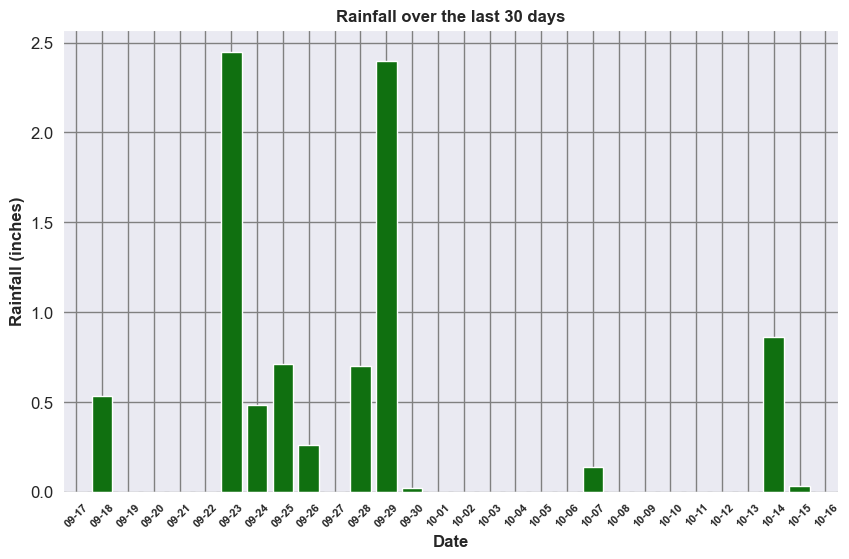

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

path2 = '/var/www/html/000/'

year = (df['Year']).astype(str)
month = (df['Month']).astype(str)
day = (df['Day']).astype(str)

df['newDate'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['new_date'] = df['newDate'].dt.date
df['new_date'].astype('str')
df['new_date'] = df['new_date'].apply(str).str.replace('2023-', '')

sns.set_style('darkgrid')

plt.figure(figsize= (10,6))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 8, rotation = 45, fontweight = 'bold')
plt.title('Rainfall over the last 30 days', fontsize = 12, fontweight = 'bold')
plt.grid(axis = "y", linewidth = 1.0, color = 'gray')
plt.grid(axis = "x", linewidth = 1.0, color = 'gray')
sns.barplot(data = df, x = 'new_date' , y = 'Rain', color = 'g', width=0.8)
plt.xlabel('Date',fontsize = 12, fontweight = 'bold')
plt.ylabel('Rainfall (inches)', fontsize = 12, fontweight = 'bold')
plt.grid(True)
plt.savefig(f'{path2}Rain30.png')  